<a href="https://colab.research.google.com/github/tobias-fyi/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module4-makefeatures/LS_DS_114_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# ASSIGNMENT

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [2]:
# Get the zipped data
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-09-05 19:47:36--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [                 <=>]  21.58M   898KB/s    in 25s     

2019-09-05 19:48:02 (881 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22631049]



In [4]:
# Unzip the data
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [5]:
# Preview the first section of data prior to loading
!head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

In [6]:
# Preview the very end of the dataset
!tail LoanStats_2018Q4.csv

"","","5600","5600","5600"," 36 months"," 13.56%","190.21","C","C1","","n/a","RENT","15600","Not Verified","Oct-2018","Current","n","","","credit_card","Credit card refinancing","836xx","ID","15.31","0","Aug-2012","0","","97","9","1","5996","34.5%","11","w","4264.17","4264.17","1891.55","1891.55","1335.83","555.72","0.0","0.0","0.0","Aug-2019","190.21","Sep-2019","Aug-2019","0","","1","Individual","","","","0","0","5996","0","0","0","1","20","0","","0","2","3017","35","17400","1","0","0","3","750","4689","45.5","0","0","20","73","13","13","0","13","","20","","0","3","5","4","4","1","9","10","5","9","0","0","0","0","100","25","1","0","17400","5996","8600","0","","","","","","","","","","","","N","","","","","","","","","","","","","","","N","","","","","",""
"","","23000","23000","23000"," 36 months"," 15.02%","797.53","C","C3","Tax Consultant","10+ years","MORTGAGE","75000","Source Verified","Oct-2018","Charged Off","n","","","debt_consolidation","Debt consolidation","352xx","AL","20.9

In [0]:
# Imports
import pandas as pd
import numpy as np

In [8]:
# Load the data into a pandas dataframe
# Based on the previews, I can tune the parameters 
# of the .read_csv method to clean the data as it loads
df = pd.read_csv("LoanStats_2018Q4.csv", header=1, skipfooter=2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [20]:
# Set the pandas display options
pd.set_option("display.max_columns", df.shape[1])
pd.set_option("display.max_rows", 500)

# Preview the loaded data
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000,10000,10000.0,36 months,10.33%,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,Jan-1996,0,18.0,NaN,14,0,9082,38%,23,w,8289.30,8289.30,2261.00,2261.00,1710.70,550.30,0.0,0.0,0.0,Jul-2019,324.23,Sep-2019,Aug-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,671,246828,1,3,2,3,1.0,48552,62.0,1,3,4923,46.0,23900,2,7,1,7,17631.0,11897.0,43.1,0,0,158.0,275,11,1,1,11.0,NaN,11.0,NaN,0,3,4,7,7,10,9,11,4,14,0.0,0,0,4,91.3,28.6,0,0,367828,61364,20900,54912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,4000,4000,4000.0,36 months,23.40%,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,070xx,NJ,26.33,0,Sep-2006,4,59.0,NaN,15,0,5199,19.2%,20,w,3423.38,3423.38,1081.96,1081.96,576.62,505.34,0.0,0.0,0.0,Jul-2019,155.68,Sep-2019,Aug-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,66926,5,4,3,4,5.0,61727,86.0,6,11,1353,68.0,27100,4,0,4,15,4462.0,20174.0,7.9,0,0,147.0,118,2,2,0,2.0,NaN,0.0,NaN,0,5,7,9,9,8,11,12,7,15,0.0,0,0,9,95.0,0.0,0,0,98655,66926,21900,71555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Late (31-120 days),n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,4456.17,4456.17,895.96,895.96,543.83,352.13,0.0,0.0,0.0,Jun-2019,180.69,Sep-2019,Aug-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,110299,0,1,0

In [13]:
# Take a look at the number of null values in each column
df.isnull().sum().sort_values(ascending=False).head(40)

id                                            128412
desc                                          128412
member_id                                     128412
url                                           128412
orig_projected_additional_accrued_interest    128386
hardship_type                                 128385
hardship_last_payment_amount                  128385
hardship_payoff_balance_amount                128385
hardship_reason                               128385
hardship_loan_status                          128385
hardship_dpd                                  128385
hardship_length                               128385
payment_plan_start_date                       128385
hardship_end_date                             128385
hardship_start_date                           128385
hardship_amount                               128385
deferral_term                                 128385
hardship_status                               128385
settlement_percentage                         

In [0]:
# Drop blank columns
blank_columns = ["id", "desc", "member_id", "url"]
df_2 = df.drop(columns=blank_columns)  # Decided to copy the dataset instead of replace it

In [16]:
# Confirm that it worked as expected
df_2.isnull().sum().sort_values(ascending=False).head(10)

orig_projected_additional_accrued_interest    128386
hardship_loan_status                          128385
hardship_dpd                                  128385
hardship_reason                               128385
hardship_status                               128385
deferral_term                                 128385
hardship_amount                               128385
hardship_start_date                           128385
hardship_end_date                             128385
payment_plan_start_date                       128385
dtype: int64

In [17]:
df_2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,10000,10000,10000.0,36 months,10.33%,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,Jan-1996,0,18.0,NaN,14,0,9082,38%,23,w,8289.30,8289.30,2261.00,2261.00,1710.70,550.30,0.0,0.0,0.0,Jul-2019,324.23,Sep-2019,Aug-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,671,246828,1,3,2,3,1.0,48552,62.0,1,3,4923,46.0,23900,2,7,1,7,17631.0,11897.0,43.1,0,0,158.0,275,11,1,1,11.0,NaN,11.0,NaN,0,3,4,7,7,10,9,11,4,14,0.0,0,0,4,91.3,28.6,0,0,367828,61364,20900,54912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,4000,4000,4000.0,36 months,23.40%,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,070xx,NJ,26.33,0,Sep-2006,4,59.0,NaN,15,0,5199,19.2%,20,w,3423.38,3423.38,1081.96,1081.96,576.62,505.34,0.0,0.0,0.0,Jul-2019,155.68,Sep-2019,Aug-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,66926,5,4,3,4,5.0,61727,86.0,6,11,1353,68.0,27100,4,0,4,15,4462.0,20174.0,7.9,0,0,147.0,118,2,2,0,2.0,NaN,0.0,NaN,0,5,7,9,9,8,11,12,7,15,0.0,0,0,9,95.0,0.0,0,0,98655,66926,21900,71555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,5000,5000,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Late (31-120 days),n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,4456.17,4456.17,895.96,895.96,543.83,352.13,0.0,0.0,0.0,Jun-2019,180.69,Sep-2019,Aug-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,110299,0,1,0,2,14.0,7150,72.0,0,2,0,35.0,24100,1,5,0,4,18383.0,13800.0,0.0,0,0,87.

## String Manipulation

In [21]:
print(df_2.dtypes)

loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
purpose                                        object
title                                          object
zip_code                    

In [24]:
# First column to tackle is "int_rate"
# It should be a float, not a string / "object"

# Get one example to work with / test out the function
int_rate_ex = df_2.iloc[1][4]
print(int_rate_ex)

 23.40%


In [25]:
# This shows a leading space in the data as well as the percent sign
int_rate_ex[:-1]

' 23.40'

In [28]:
# Using a double strip to get rid of both extra characters
int_rate_stripped = int_rate_ex.strip().strip("%")
int_rate_stripped

'23.40'

In [30]:
# Now we have the number by itself in the string
# Convert it to a float
int_rate_float = float(int_rate_stripped)
print(int_rate_float)
print(type(int_rate_float))

23.4
<class 'float'>


In [0]:
# Looks good, now to put that into a function
# Which can be run on all records in the column
def int_rate_to_float(string):
    """Converts percentage string to float."""
    return float(string.strip().strip("%"))

In [34]:
# Test it out with another example cell
int_rate_ex_2 = df_2.iloc[5][4]
int_rate_ex_2

' 11.80%'

In [35]:
ex_2_result = int_rate_to_float(int_rate_ex_2)
print(ex_2_result)
print(type(ex_2_result))

11.8
<class 'float'>


In [37]:
# Looks like it worked as expected
# Time to run the function through all of the rows in the column
df_2["int_rate"] = df_2["int_rate"].apply(int_rate_to_float)
df_2["int_rate"].head()

0    10.33
1    23.40
2    17.97
3    20.89
4    23.40
Name: int_rate, dtype: float64

## Categorical Cleaning

In [38]:
# Check frequency of each category
df_2["emp_title"].value_counts(dropna=False).head(16)

NaN                   20947
Teacher                2090
Manager                1773
Registered Nurse        952
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Operations Manager      387
Truck Driver            387
Nurse                   326
Name: emp_title, dtype: int64

In [39]:
df_2["emp_title"].describe()

count      107465
unique      43892
top       Teacher
freq         2090
Name: emp_title, dtype: object

The `emp_title` column has an inordinately large number of different categories (42,892). Some of them are considered by pandas as separate categories because of a difference as simple as capitalization. It would be useful to try and aggregate them.

In [40]:
# The "emp_title" column also has a large number of null records
df_2["emp_title"].isnull().sum()

20947

In [0]:
# First I'll just do a capititalization and strip
def simple_clean_title(title):
    if isinstance(title, str):
        return title.strip().title()
    else:
        return "Unknown"

In [42]:
df_2["emp_title"] = df_2["emp_title"].apply(simple_clean_title)

df_2["emp_title"].value_counts().head(20)

Unknown               20947
Teacher                2557
Manager                2395
Registered Nurse       1418
Driver                 1258
Supervisor             1160
Truck Driver            920
Rn                      834
Office Manager          805
Sales                   803
General Manager         791
Project Manager         720
Owner                   625
Director                523
Operations Manager      518
Sales Manager           500
Police Officer          440
Nurse                   425
Technician              420
Engineer                412
Name: emp_title, dtype: int64

In [0]:
# I'd like to clean the data beyond setting the NaN values to Unknown
# I'd also like to fix capitalization and aggregate titles that are the same
# but considered unique by pandas because of other simple reasons

# I will get the dictionary started, but won't implement it until I have time at the end
titles = {
    "Nurse": ["registered nurse", "rn", "nurse"],  # Can also include `str.contains("nurse", case=False)
}

def clean_title(title):
    pass

### Creating New Features

Use the `emp_title` feature to create a new feature `emp_title_mgmt` containing a boolean that indicates whether that individual is a manager or not.

In [43]:
df_2["emp_title_mgmt"] = False
df_2["emp_title_mgmt"].head()

0    False
1    False
2    False
3    False
4    False
Name: emp_title_mgmt, dtype: bool

In [47]:
df_2["emp_title_mgmt"] = df_2["emp_title"].str.contains("manager", case=False)
df_2["emp_title_mgmt"].head(24)

0     False
1     False
2     False
3     False
4      True
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23     True
Name: emp_title_mgmt, dtype: bool

In [49]:
# Confirm it worked as expected by looking at the actual data
df_2["emp_title"].head(24)
# Seems to check out

0                              Unknown
1                             Security
2                       Administrative
3                             Operator
4                              Manager
5                   Nursing Supervisor
6                              Unknown
7                           Postmaster
8                                 Chef
9                              Unknown
10                    Material Handler
11           Instructional Coordinator
12    Financial Relationship Associate
13                             Unknown
14                 Sale Representative
15                  Driver Coordinator
16                       Gas Attendant
17                           Processor
18         Neonatal Nurse Practitioner
19                 Stationary Engineer
20                             Unknown
21                   Exhibits Director
22                    Worship Director
23                     Program Manager
Name: emp_title, dtype: object

## DataFrame Filtering

Create a new DataFrame consisting only of rows that meet defined conditions.

In [51]:
# Create new separate dataframes for managers
mgmt = df_2[df_2["emp_title_mgmt"] == True]
print(mgmt.shape)
mgmt.head()

(17885, 141)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_mgmt
4,8000,8000,8000.0,36 months,23.40,311.35,E,E1,Manager,10+ years,OWN,43000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,357xx,AL,33.24,0,Jan-1995,0,NaN,107.0,8,1,9019,81.3%,16,w,6846.83,6846.83,2163.85,2163.85,1153.17,1010.68,0.0,0.0,0.0,Jul-2019,311.35,Sep-2019,Aug-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,169223,0,3,2,2,7.0,22059,69.0,0,0,2174,72.0,11100,1,1,1,2,21153.0,126.0,94.5,0,0,148.0,287,44,7,1,51.0,NaN,7.0,NaN,0,1,4,1,2,8,4,7,4,8,0.0,0,0,2,100.0,100.0,1,0,199744,31078,2300,32206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True
23,3300,3300,3300.0,36 months,23.40,128.44,E,E1,Program Manager,3 years,RENT,49700.0,Source Verified,Dec-2018,Current,n,vacation,Vacation,310xx,GA,14.32,0,Nov-2006,1,43.0,NaN,6,0,2358,26.5%,46,w,2824.26,2824.26,892.64,892.64,475.74,416.90,0.0,0.0,0.0,Jul-2019,128.44,Sep-2019,Aug-2019,0,43.0,1,Individual,NaN,NaN,NaN,0,0,166884,2,2,0,2,18.0,164526,75.0,2,2,2091,51.0,8900,0,0,1,4,27814.0,491.0,82.5,0,0,145.0,79,1,1,0,59.0,43.0,1.0,43.0,3,2,3,2,3,39,4,7,3,6,0.0,0,0,2,90.9,50.0,0,0,170985,166884,2800,162085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True
30,2000,2000,2000.0,36 months,17.97,72.28,D,D1,Account Manager,4 years,RENT,51000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,606xx,IL,2.40,0,Nov-2004,1,NaN,NaN,1,0,0,NaN,9,w,1690.04,1690.04,502.96,502.96,309.96,193.00,0.0,0.0,0.0,Jul-2019,72.28,Sep-2019,Aug-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,854,0,0,2,3,7.0,0,NaN,0,1,0,100.0,0,0,0,1,4,854.0,NaN,NaN,0,0,169.0,40,23,7,0,NaN,NaN,1.0,NaN,0,0

In [52]:
# ... and non-managers
non_mgmt = df_2[df_2["emp_title_mgmt"] == False]
print(non_mgmt.shape)
non_mgmt.head()

(110527, 141)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_mgmt
0,10000,10000,10000.0,36 months,10.33,324.23,B,B1,Unknown,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,Jan-1996,0,18.0,NaN,14,0,9082,38%,23,w,8289.30,8289.30,2261.00,2261.00,1710.70,550.30,0.0,0.0,0.0,Jul-2019,324.23,Sep-2019,Aug-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,671,246828,1,3,2,3,1.0,48552,62.0,1,3,4923,46.0,23900,2,7,1,7,17631.0,11897.0,43.1,0,0,158.0,275,11,1,1,11.0,NaN,11.0,NaN,0,3,4,7,7,10,9,11,4,14,0.0,0,0,4,91.3,28.6,0,0,367828,61364,20900,54912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
1,4000,4000,4000.0,36 months,23.40,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,070xx,NJ,26.33,0,Sep-2006,4,59.0,NaN,15,0,5199,19.2%,20,w,3423.38,3423.38,1081.96,1081.96,576.62,505.34,0.0,0.0,0.0,Jul-2019,155.68,Sep-2019,Aug-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,66926,5,4,3,4,5.0,61727,86.0,6,11,1353,68.0,27100,4,0,4,15,4462.0,20174.0,7.9,0,0,147.0,118,2,2,0,2.0,NaN,0.0,NaN,0,5,7,9,9,8,11,12,7,15,0.0,0,0,9,95.0,0.0,0,0,98655,66926,21900,71555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Late (31-120 days),n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,4456.17,4456.17,895.96,895.96,543.83,352.13,0.0,0.0,0.0,Jun-2019,180.69,Sep-2019,Aug-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,110299,0,1,0,2,14.0,7150,72.0,0,2,0,35.0,24100,1,5,0,4

In [0]:
import matplotlib.pyplot as plt

In [0]:
# Going to give seaborn a try if I have time after completing a date(s) with pandas (...:)
import seaborn

In [59]:
# Wanted to know how to access the index of a dataframe
# Should've guessed...
mgmt.index

Int64Index([     4,     23,     30,     37,     48,     54,     64,     66,
                72,     74,
            ...
            128356, 128357, 128370, 128371, 128372, 128374, 128379, 128384,
            128394, 128411],
           dtype='int64', length=17885)

In [67]:
len(mgmt["annual_inc"].value_counts(dropna=False))

1747

In [68]:
len(mgmt["int_rate"].value_counts(dropna=False))

45

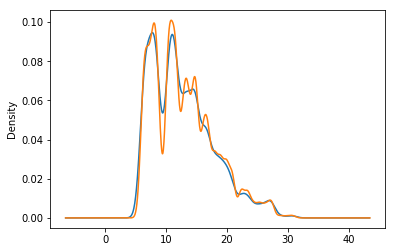

In [73]:
# Make some plots to visualize the two new dataframes
mgmt["int_rate"].plot.density();
non_mgmt["int_rate"].plot.density();
# I finally figured out how to superimpose two density plots...

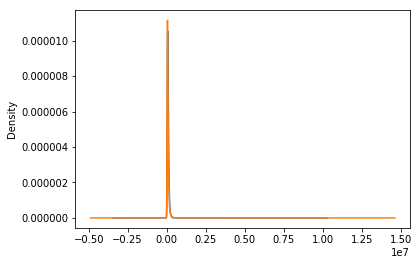

In [74]:
# Let's see what it looks like when plotting incomes
mgmt["annual_inc"].plot.density();
non_mgmt["annual_inc"].plot.density();
# Not much use like this, but maybe if I zoom in on the spikes

(0, 500000)

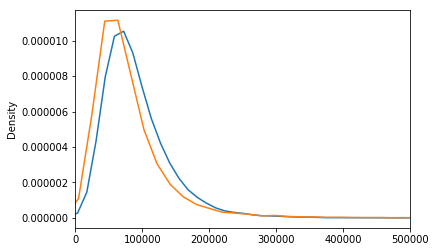

In [83]:
# Not much use like this, but maybe if I zoom in on the spikes
mgmt["annual_inc"].plot.density();
non_mgmt["annual_inc"].plot.density();
plt.xlim(0, 500000)
# Blue is mgmt; orange is non-mgmt (or plebians, as Ryan called them)

## Dates with Pandas

In [84]:
df_2["issue_d"].head(20)

0     Dec-2018
1     Dec-2018
2     Dec-2018
3     Dec-2018
4     Dec-2018
5     Dec-2018
6     Dec-2018
7     Dec-2018
8     Dec-2018
9     Dec-2018
10    Dec-2018
11    Dec-2018
12    Dec-2018
13    Dec-2018
14    Dec-2018
15    Dec-2018
16    Dec-2018
17    Dec-2018
18    Dec-2018
19    Dec-2018
Name: issue_d, dtype: object

In [85]:
# Pandas makes it stupid easy to convert that to a datetime object
# No regex or formatting input required!
df_2["issue_d"] = pd.to_datetime(df_2["issue_d"], infer_datetime_format=True)
df_2["issue_d"].head()

0   2018-12-01
1   2018-12-01
2   2018-12-01
3   2018-12-01
4   2018-12-01
Name: issue_d, dtype: datetime64[ns]

In [86]:
# Scoping out the values under the hood of that data type
df_2["issue_d"].head().values

array(['2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [87]:
# Create new distinct features for the month and year
df_2["issue_yr"] = df_2["issue_d"].dt.year
df_2["issue_mo"] = df_2["issue_d"].dt.month
df_2.loc[:5, ["issue_yr", "issue_mo"]]

,issue_yr,issue_mo
0,2018,12
1,2018,12
2,2018,12
3,2018,12
4,2018,12
5,2018,12


In [0]:
# Working with dates in the earliest credit line feature
df_2["earliest_cr_line"] = pd.to_datetime(df_2["earliest_cr_line"], infer_datetime_format=True)

In [89]:
# This time to make some calculations
credit_history_in_days = (df_2["issue_d"] - df_2["earliest_cr_line"])
# And using that to create a new feature
df_2["credit_history_length_days"] = credit_history_in_days.dt.days
df_2["credit_history_length_days"].head()

0    8370
1    4474
2    2801
3    7973
4    8735
Name: credit_history_length_days, dtype: int64

In [90]:
df_2["credit_history_length_days"].describe()

count    128412.000000
mean       5859.891490
std        2886.535578
min        1126.000000
25%        4049.000000
50%        5266.000000
75%        7244.000000
max       25171.000000
Name: credit_history_length_days, dtype: float64

#### Convert the `term` column from string to integer.

In [93]:
# First, take a look at the data
df_2["term"].head(24)

0      36 months
1      36 months
2      36 months
3      60 months
4      36 months
5      60 months
6      36 months
7      60 months
8      36 months
9      60 months
10     60 months
11     60 months
12     60 months
13     60 months
14     36 months
15     36 months
16     36 months
17     60 months
18     60 months
19     60 months
20     36 months
21     36 months
22     36 months
23     36 months
Name: term, dtype: object

In [96]:
# I can think of a few ways to do strip everything from the number
# I could split the string on the space and grab the index for the number section
# I could also just splice the string to grab the two characters
# I could also strip away all of the other characters - e.g. .strip(" months")
# I can think of other ways, but I'll first create the example cell to work with
term_ex_1 = df_2.iloc[1][3]
term_ex_1

' 36 months'

In [99]:
# There is a leading space as well that will have to be taken care of
# First I'll try the split method
term_ex_split = term_ex_1.strip().split(" ")
term_ex_split[0]

'36'

In [103]:
# I'm going to try the strip method
chars = " abcdefghijklmnopqrstuvwxyz"  # Maybe a bit overkill but could work with other columns as well
term_ex_strip = int(term_ex_1.strip(chars))
print(term_ex_strip)
type(term_ex_strip)
# This seems like it might be better, as it doesn't have to deal with lists

36


int

In [0]:
# Put the strip method into a function
chars = " abcdefghijklmnopqrstuvwxyz"

def strip_letters(term):
    return int(term.strip(chars))

In [105]:
# Apply it to the rows in the "term" column
df_2["term"] = df_2["term"].apply(strip_letters)
df_2["term"].head(16)

0     36
1     36
2     36
3     60
4     36
5     60
6     36
7     60
8     36
9     60
10    60
11    60
12    60
13    60
14    36
15    36
Name: term, dtype: int64

#### Loan Status

- Create new feature "loan_status_is_great"
- Contain 1 if "loan_status" is "current" or "fully paid"
- Else 0

In [107]:
df_2.head(24)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_mgmt,issue_yr,issue_mo,credit_history_length_days
0,10000,10000,10000.0,36,10.33,324.23,B,B1,Unknown,< 1 year,MORTGAGE,280000.0,Not Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,1996-01-01,0,18.0,NaN,14,0,9082,38%,23,w,8289.30,8289.30,2261.000000,2261.00,1710.70,550.30,0.0,0.0,0.0,Jul-2019,324.23,Sep-2019,Aug-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,671,246828,1,3,2,3,1.0,48552,62.0,1,3,4923,46.0,23900,2,7,1,7,17631.0,11897.0,43.1,0,0,158.0,275,11,1,1,11.0,NaN,11.0,NaN,0,3,4,7,7,10,9,11,4,14,0.0,0,0,4,91.3,28.6,0,0,367828,61364,20900,54912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12,8370
1,4000,4000,4000.0,36,23.40,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,070xx,NJ,26.33,0,2006-09-01,4,59.0,NaN,15,0,5199,19.2%,20,w,3423.38,3423.38,1081.960000,1081.96,576.62,505.34,0.0,0.0,0.0,Jul-2019,155.68,Sep-2019,Aug-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,66926,5,4,3,4,5.0,61727,86.0,6,11,1353,68.0,27100,4,0,4,15,4462.0,20174.0,7.9,0,0,147.0,118,2,2,0,2.0,NaN,0.0,NaN,0,5,7,9,9,8,11,12,7,15,0.0,0,0,9,95.0,0.0,0,0,98655,66926,21900,71555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12,4474
2,5000,5000,5000.0,36,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,2018-12-01,Late (31-120 days),n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,2011-04-01,0,NaN,NaN,8,0,4599,19.1%,13,w,4456.17,4456.17,895.960000,895.96,543.83,352.13,0.0,0.0,0.0,Jun-2019,180.69,Sep-2019,Aug-2019,0,NaN,1,Individ

In [109]:
# First thing is to create the new dataframe column
df_2["loan_status_is_great"] = 0
df_2["loan_status_is_great"].head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status_is_great, dtype: int64

In [0]:
# Now to set the new column to 1 according to the conditions

# Function to check each row of "loan_status" and assign to "loan_status_is_great" accordingly
def loan_status(row):
    if row["loan_status"] == "Current" or row["loan_status"] == "Fully Paid":
        return 1
    else:
        return 0

In [117]:
df_2["loan_status_is_great"] = df_2.apply(loan_status, axis=1)
df_2.loc[:16, ["loan_status", "loan_status_is_great"]]

,loan_status,loan_status_is_great
0,Current,1
1,Current,1
2,Late (31-120 days),0
3,Current,1
4,Current,1
5,Current,1
6,Current,1
7,Current,1
8,Fully Paid,1
9,Current,1


In [0]:
# Checking more records to be sure it worked as expected
df_2.loc[:64, ["loan_status", "loan_status_is_great"]]
# Seems to have worked as expected (cleared long output)

#### Create "last_pymnt_d_month" and "last_pymnt_d_year" columns

In [121]:
# Scope out the "last_pymnt_d" column
df_2["last_pymnt_d"].head(16)

0     Jul-2019
1     Jul-2019
2     Jun-2019
3     Jul-2019
4     Jul-2019
5     Jul-2019
6     Aug-2019
7     Jul-2019
8     May-2019
9     Jul-2019
10    Jul-2019
11    Jul-2019
12    Jul-2019
13    Jul-2019
14    Jul-2019
15    Aug-2019
Name: last_pymnt_d, dtype: object

In [123]:
# Should be able to use the same method as used for "issue_d"
# First, convert the column cells to datetime datatype
df_2["last_pymnt_d"] = pd.to_datetime(df_2["last_pymnt_d"], infer_datetime_format=True)
df_2["last_pymnt_d"].head(16)

0    2019-07-01
1    2019-07-01
2    2019-06-01
3    2019-07-01
4    2019-07-01
5    2019-07-01
6    2019-08-01
7    2019-07-01
8    2019-05-01
9    2019-07-01
10   2019-07-01
11   2019-07-01
12   2019-07-01
13   2019-07-01
14   2019-07-01
15   2019-08-01
Name: last_pymnt_d, dtype: datetime64[ns]

In [124]:
# Now I can access the month of that datetime using .dt.month
df_2["last_pymnt_d_year"] = df_2["last_pymnt_d"].dt.year
df_2["last_pymnt_d_month"] = df_2["last_pymnt_d"].dt.month
df_2.loc[:8, ["last_pymnt_d_year", "last_pymnt_d_month"]]

,last_pymnt_d_year,last_pymnt_d_month
0,2019.0,7.0
1,2019.0,7.0
2,2019.0,6.0
3,2019.0,7.0
4,2019.0,7.0
5,2019.0,7.0
6,2019.0,8.0
7,2019.0,7.0
8,2019.0,5.0


In [125]:
# Not sure why it converted them to floats
# Let's investigate
df_2["last_pymnt_d_year"].head()
# Apparently it can be caused by the column having NaN values

0    2019.0
1    2019.0
2    2019.0
3    2019.0
4    2019.0
Name: last_pymnt_d_year, dtype: float64

In [0]:
# Brute force method: function -> apply to each row
# Could also drop those records ...

def cast_to_int(cell):
    return int(cell) if isinstance(cell, float) else cell

In [127]:
# Try it out
df_2["last_pymnt_d_year"] = df_2["last_pymnt_d_year"].apply(cast_to_int)
df_2["last_pymnt_d_month"] = df_2["last_pymnt_d_month"].apply(cast_to_int)
df_2.loc[:8, ["last_pymnt_d_year", "last_pymnt_d_month"]]
# Nope - will try it out more later on

ValueError: ignored

---
---

# STRETCH OPTIONS

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

In [0]:
# Find the other percent signs column that was mentioned


You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01